In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

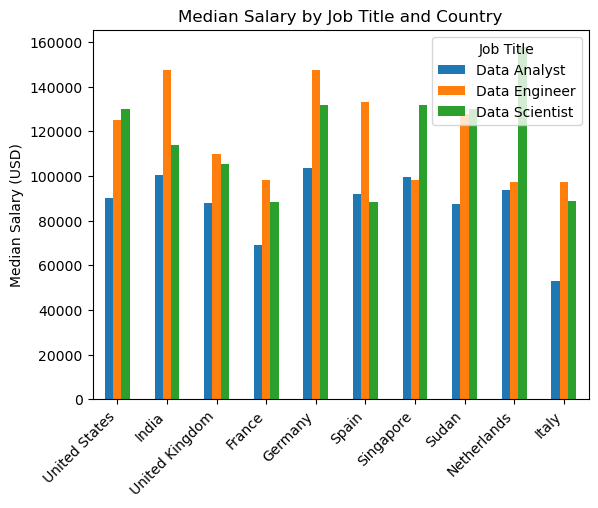

In [19]:
top_countries = df['job_country'].value_counts().head(10).index

df_job_country_salary = df.pivot_table(
  values='salary_year_avg',
  index='job_country',
  columns='job_title_short',
  aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
plt.title('Median Salary by Job Title and Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Title')
plt.show()

In [ ]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

In [ ]:
df.groupby('job_title_short')['salary_year_avg'].median()